# OUTLINE:
- TASK 1 - Conversion Rate Analysis
- TASK 2 - Data Preparation
- TASK 3 - Machine Learning Modelling
- TASK 4 - Evaluate Business Impact from Personality Analysis

# TASK 1 - CONVERSION RATE ANALYSIS

## Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

url = 'https://raw.githubusercontent.com/mmalik17/Rakamin-Mini-Project/main/Customer-Personality-Analysis-for-Marketing-Campaign/marketing_campaign_data.csv'
df = pd.read_csv(url)
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## Feature Engineering

In [2]:
#Feature Engineering of Age
df['Age'] = 2023 - df['Year_Birth']

#Feature Engineering of Number of Children at home
df['Children'] = df['Kidhome']+df['Teenhome']

#Feature Engineering of Total Spending
df['Spending'] = df['MntCoke']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

#Feature Engineering of Total Transaction
df['Transaction'] = df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

#Feature Engineering of conversion rate with #Response / #Visit
    #Count the number of response on previous campaigns
df['Total_Accepted'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']
    #Calculate the conversion rate
df['ConversionRate'] = df['Total_Accepted']/(df['NumWebVisitsMonth']+0.5)
    #Note: 0.5 number is used to prevent infinite result


    #Age Segmenting
def segmen_age(x):
    if x<18:
        return 'aged 0-17'
    elif x<25:
        return 'aged 18-24'
    elif x<35:
        return 'aged 25-34'
    elif x<45:
        return 'aged 35-44'
    elif x<55:
        return 'aged 45-54'
    elif x<65:
        return 'aged 55-64'
    else:
        return 'aged more than 65 years'
df['Age_Segment'] = df['Age'].apply(lambda x: segmen_age(x))

In [3]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df["Year_Customer"] = df["Dt_Customer"].apply(lambda x: x.year)

## Exploratory Data Analysis of Income, Spending, dan Age

<Axes: xlabel='Income', ylabel='ConversionRate'>

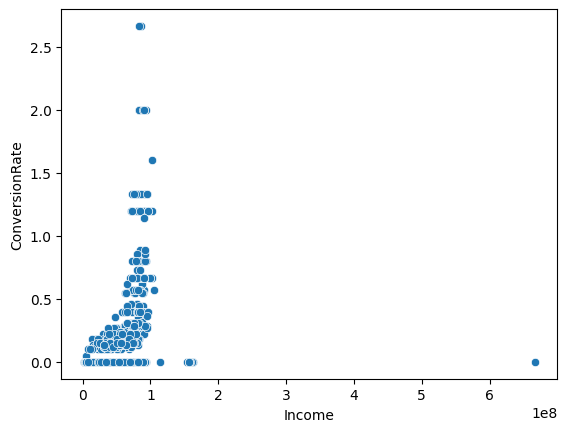

In [4]:
sns.scatterplot(data = df, x ='Income',y='ConversionRate')

<Axes: xlabel='Spending', ylabel='ConversionRate'>

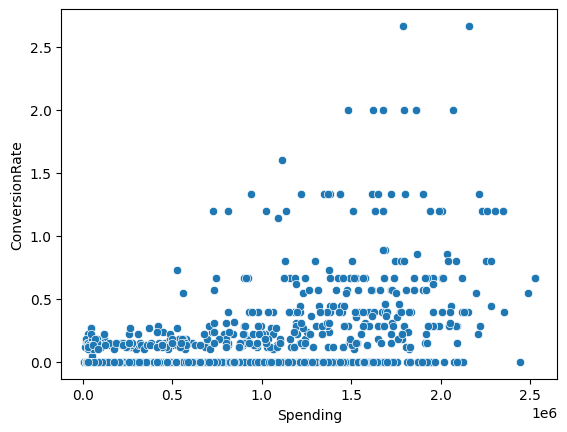

In [5]:
sns.scatterplot(data = df, x ='Spending',y='ConversionRate')

Text(0, 0.5, 'Conversion Rate Mean')

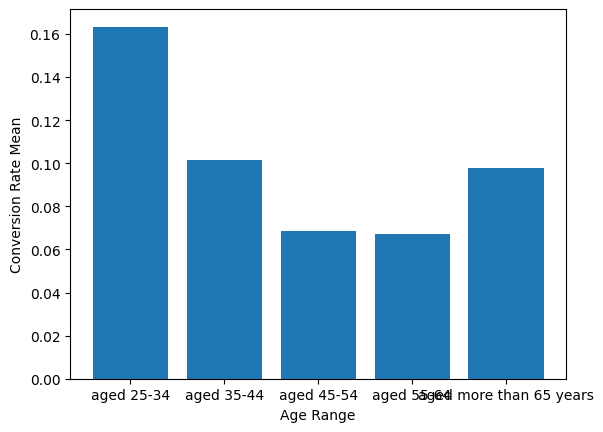

In [6]:
df_group = df.groupby('Age_Segment').agg({'ConversionRate':'mean'}).reset_index()
x = df_group['Age_Segment'].to_list()
y = df_group['ConversionRate'].to_list()

plt.bar(x, y)
plt.xlabel('Age Range')
plt.ylabel('Conversion Rate Mean')

# TASK 2 - DATA PREPARATION

## 1. Checking the missing data dan duplicated data

In [7]:
print("Number of Missing Data:")
print(df.isnull().sum())
print('-------------------')
print("Number of Duplicated Data:")
print(df.duplicated().sum())

Number of Missing Data:
Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Children                0
Spending                0
Transaction             0
Total_Accepted          0
ConversionRate          0
Age_Segment             0
Year_Customer 

The amount of missing data is not significant, only 24 rows out of 2240 rows (only about 1% only), even it is only happened in 1 column. Therefore, the lost data is deleted.

## 2. Drop the unnecesarry data

List of unnecessary data:
- The row that contains the missing value
- Columns whose values are not related to purchase decisions, such as ID
- Columns that have been feature-engineered before, such as Age, Year_Birth, etc

In [8]:
#drop missing data
df = df.dropna()

#drop unnecessary column
df = df.drop(['Unnamed: 0','ID','Year_Birth','Dt_Customer','Age','Kidhome','Teenhome','MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',
              'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Z_CostContact','Z_Revenue'], axis=1)

## 3. Feature Encoding

The column that is used for feature encoding directly is the age segment column. This is because, in the dataset above, the age span in one age segment is 10 years (such as 25-34, 35-44, etc) except for the lowest and oldest age segments.

As for the education column, the numbering in the feature encoding is determined by the number of study years from the start of high school entry to the last education, assuming a high school education period of 3 years, D3 for 3 years, S1 for 4 years, Masters for 2 years, and Doctoral for 2 years

In [9]:
#label encoding age segment
label_segment = {
    'aged 0-17':1,
    'aged 18-24':2,
    'aged 25-34':3,
    'aged 35-44':4,
    'aged 45-54':5,
    'aged 55-64':6,
    'aged more than 65 years':7
    }
df['Age_Segment'] = df['Age_Segment'].map(label_segment)

#label encoding education
label_education = {
    'SMA':3,
    'D3':6,
    'S1':7,
    'S2':9,
    'S3':11
    }
df['Education'] = df['Education'].map(label_education)

#label encoding marital status
label_mar_status = {
    'Menikah':1,
    'Bertunangan':1,
    'Lajang':0,
    'Cerai':0,
    'Janda':0,
    'Duda':0
    }
df['Marital_Status'] = df['Marital_Status'].map(label_mar_status)

df

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Children,Spending,Transaction,Total_Accepted,ConversionRate,Age_Segment,Year_Customer
0,7,0,58138000.0,58,3,8,10,4,7,0,1,0,1617000,25,0,0.000000,7,2012
1,7,0,46344000.0,38,2,1,1,2,5,0,0,2,27000,6,0,0.000000,7,2014
2,7,1,71613000.0,26,1,8,2,10,4,0,0,0,776000,21,0,0.000000,6,2013
3,7,1,26646000.0,26,2,2,0,4,6,0,0,1,53000,8,0,0.000000,4,2014
4,11,1,58293000.0,94,5,5,3,6,5,0,0,1,422000,19,0,0.000000,4,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,7,1,61223000.0,46,2,9,3,4,5,0,0,1,1341000,18,0,0.000000,6,2013
2236,11,1,64014000.0,56,7,8,2,5,7,0,0,3,444000,22,1,0.133333,7,2014
2237,7,0,56981000.0,91,1,2,3,13,6,0,0,0,1241000,19,1,0.153846,4,2014
2238,9,1,69245000.0,8,2,6,5,10,3,0,0,1,843000,23,0,0.000000,7,2014


## 4.Feature Standardization

In [47]:
from sklearn.preprocessing import StandardScaler

# Separate the dataset with input and output column
X = df.drop(['Response'], axis=1)
Y = df['Response']

#proses std scaler
std =  X.columns.to_list()
stdscaler = StandardScaler()

#fit train data
stdscaler.fit(X[std])

#transform train data
X[std] = stdscaler.transform(X[std])

# TASK 3 - MACHINE LEARNING MODELLING WITH CLUSTERING

<Axes: >

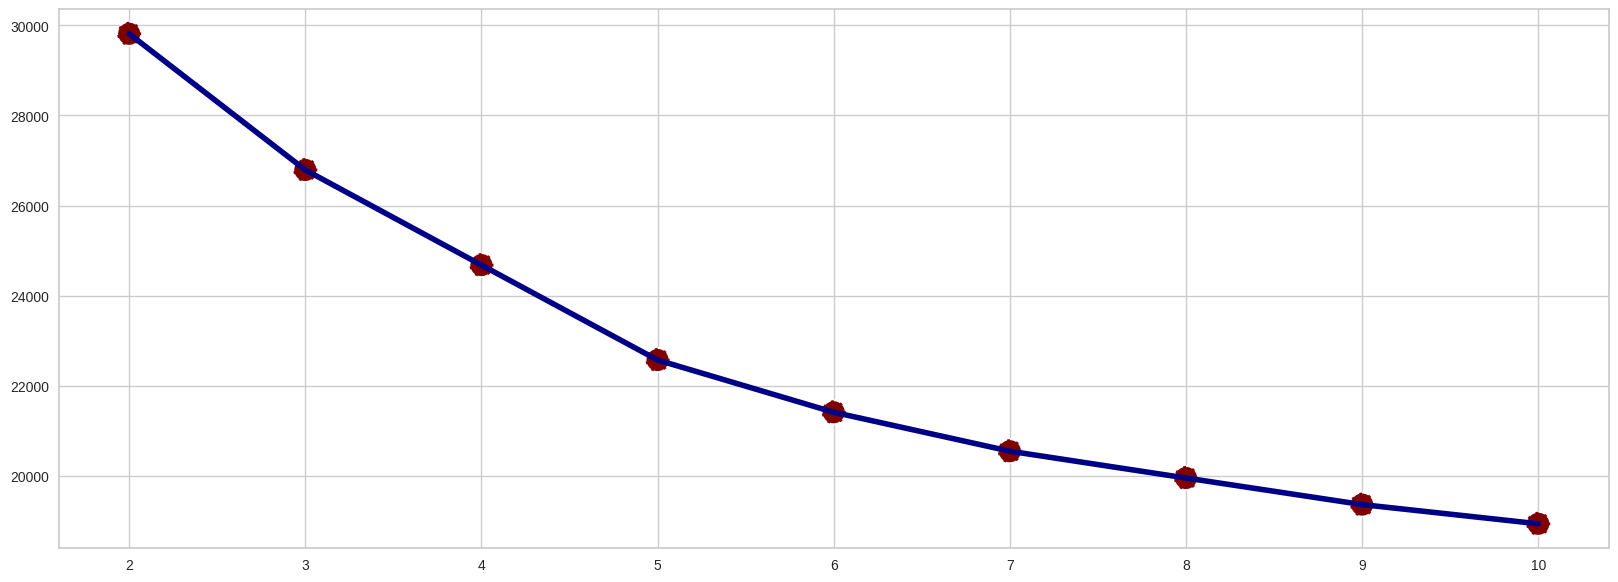

In [48]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X.values)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(20, 7))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

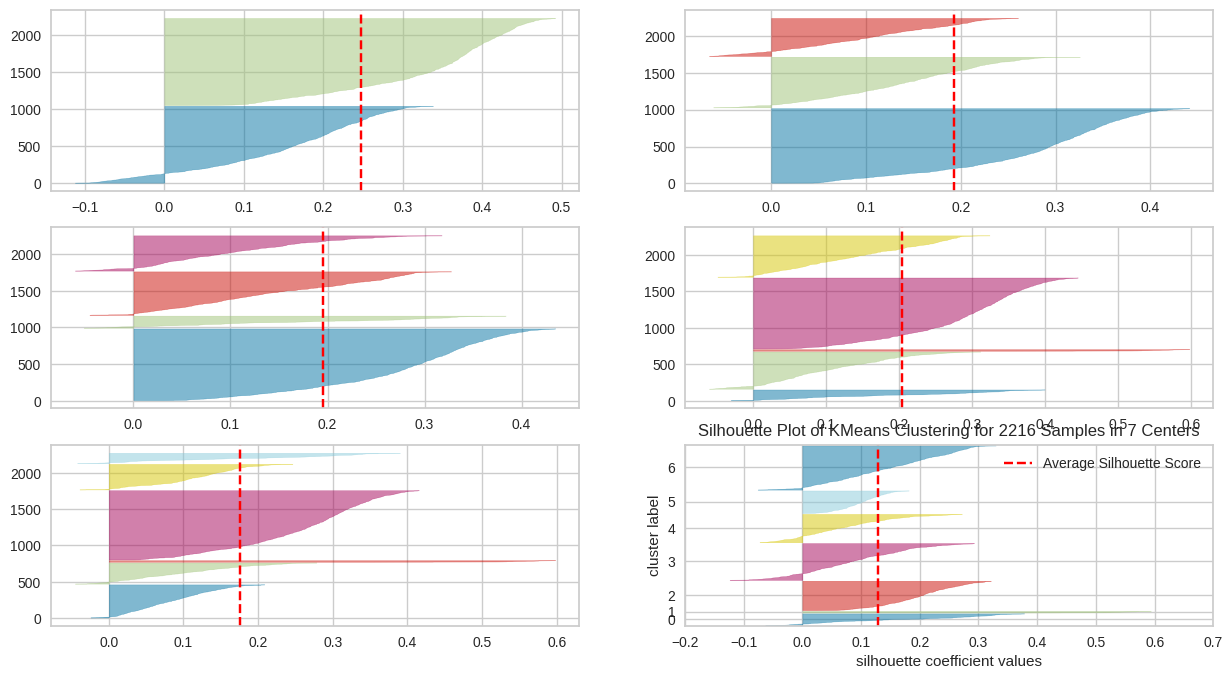

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2216 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [49]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=100, random_state=0)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick',
                                      ax=ax[q-1][mod])
    visualizer.fit(X)

visualizer.show()

# TASK 4 - BUSINESS IMPACT EVALUATION BY PERSONALITY ANALYSIS

In [50]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X.values)

df['cluster'] = kmeans.labels_
df.sample(7)

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Children,Spending,Transaction,Total_Accepted,ConversionRate,Age_Segment,Year_Customer,cluster
1698,11,0,41437000.0,5,1,1,0,3,7,0,0,2,32000,5,0,0.000000,7,2012,1
1235,7,1,64722000.0,47,4,8,2,11,6,0,0,1,805000,25,0,0.000000,5,2014,2
1487,11,1,64014000.0,56,7,8,2,5,7,0,0,3,444000,22,1,0.133333,7,2014,2
859,6,1,85710000.0,5,1,6,9,10,2,0,0,0,1062000,26,1,0.400000,3,2013,0
1940,11,1,73356000.0,56,1,5,11,5,2,0,1,0,1512000,22,3,1.200000,4,2014,3
1986,7,1,57113000.0,45,6,4,1,5,7,0,0,2,263000,16,0,0.000000,5,2013,2
1427,11,1,43269000.0,61,1,1,0,2,8,0,0,1,19000,4,0,0.000000,5,2013,1


In [51]:
cluster_agg = df.groupby('cluster').agg({'Age_Segment':'mean','Income':'mean','Recency':'mean',
                           'Spending':'mean','Complain':'mean',
                           'ConversionRate':'mean','Total_Accepted':'mean',
                           'NumDealsPurchases':'mean',
                           'NumWebPurchases':'mean',
                           'NumCatalogPurchases':'mean',
                           'NumStorePurchases':'mean'
                          }).reset_index()
cluster_agg

,cluster,Age_Segment,Income,Recency,Spending,Complain,ConversionRate,Total_Accepted,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,0,5.549165,7.448475e+07,48.717996,1.191412e+06,0.005566,0.060631,0.217069,1.389610,5.096475,5.504638,8.435993
1,1,5.187689,3.416498e+07,48.990918,9.089203e+04,0.012109,0.012229,0.085772,1.918264,2.009082,0.521695,3.166498
2,2,5.765250,5.513368e+07,49.567468,6.993641e+05,0.009242,0.034441,0.243993,4.334566,6.595194,2.833641,7.343808
3,3,5.331034,8.239873e+07,48.186207,1.618469e+06,0.006897,0.844010,2.255172,1.062069,5.151724,6.220690,8.255172


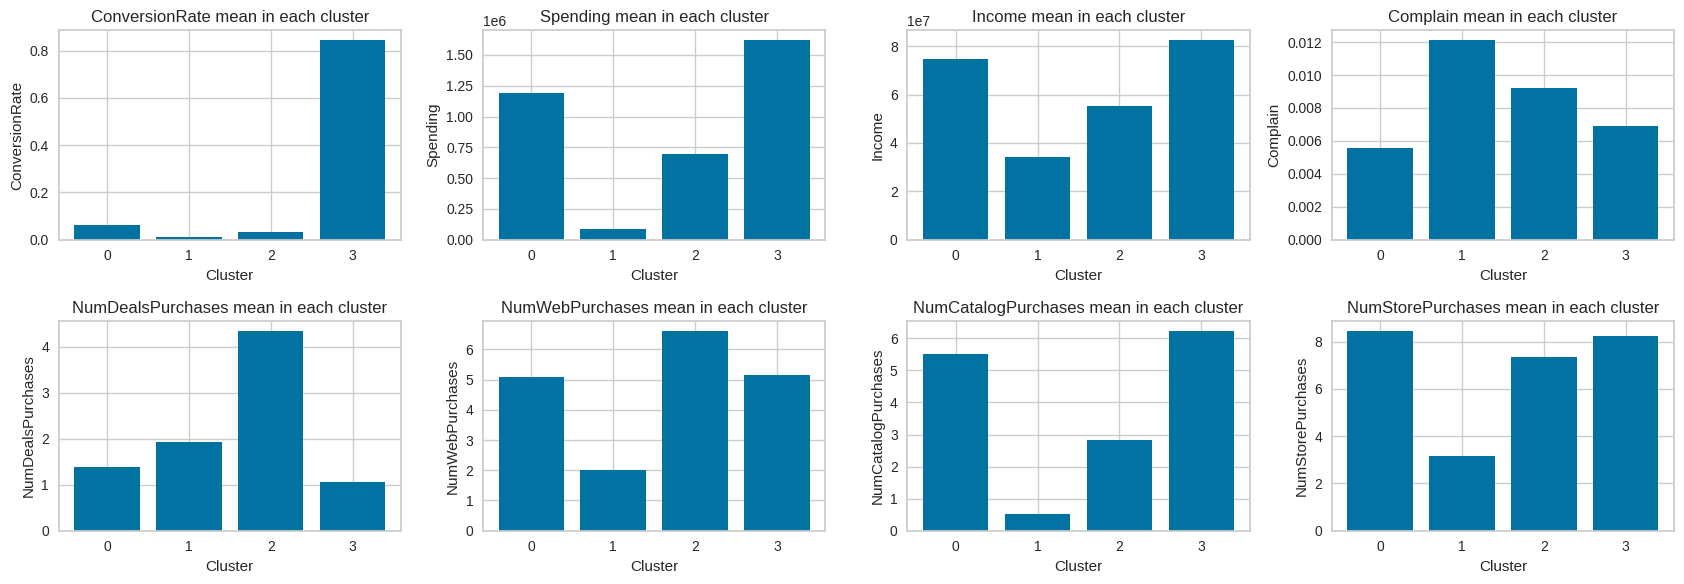

In [52]:
features = ['ConversionRate','Spending','Income','Complain',
            'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
plt.figure(figsize=(17,6))
for i in range (0,len(features)):
    plt.subplot(2,4,i+1)
    plt.bar(cluster_agg['cluster'], cluster_agg[features[i]])
    plt.title(features[i]+' mean in each cluster')
    plt.xlabel('Cluster')
    plt.ylabel(features[i])
    plt.tight_layout()

In [53]:
agg_response_rate = df.groupby('cluster').agg({'Response':'sum','Income':'count'}).reset_index()
            .rename(columns={'Response':'Number of people who accepted campaign','Income':'Number of Cluster Member'})
agg_response_rate

,cluster,Number of people who accepted campaign,Number of Cluster Member
0,0,87,539
1,1,87,991
2,2,76,541
3,3,83,145


If it is assumed that the cost for conducting the campaign is 3 dollars, and the revenue if the user accepts the campaign is 11 dollars, then the calculation of the potential for additional profit if the marketing campaign only targets the certain segment is as follows:

In [58]:
revenue_cluster_0 = 87*11
cost_cluster_0 = 539*3
profit_cluster_0 = revenue_cluster_0 - cost_cluster_0

revenue_cluster_1 = 87*11
cost_cluster_1 = 991*3
profit_cluster_1 = revenue_cluster_1 - cost_cluster_1

revenue_cluster_2 = 76*11
cost_cluster_2 = 541*3
profit_cluster_2 = revenue_cluster_2 - cost_cluster_2

revenue_cluster_3 = 83*11
cost_cluster_3 = 145*3
profit_cluster_3 = revenue_cluster_3 - cost_cluster_3

revenue_all = df[df['Response']==1].shape[0]*11
cost_all = df.shape[0]*3
profit_all = revenue_all - cost_all

print('Profit before clustering:', profit_all)
print('Profit on cluster 0:', profit_cluster_0)
print('Profit on cluster 1:', profit_cluster_1)
print('Profit on cluster 2:', profit_cluster_2)
print('Profit on cluster 3:', profit_cluster_3)

Profit before clustering: -2985
Profit on cluster 0: -660
Profit on cluster 1: -2016
Profit on cluster 2: -787
Profit on cluster 3: 478


From comparing 4 cluster, we conclude that <b> the best cluster </b> to increase profitability is <b> cluster 3 </b>.

Targetting campaign in cluster 3 is could improve company profitability from loss of 2985 dollars to gain profit of 478 dollars